# Exploring the crime in Seattle

In order to properly explore the given data, which is provided in CSV format, it is expedient to use the pandas library in python. For numerical analysis, numpy comes in handy, and last but not least we will use matplot lib for visualization.

In [159]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now that we have our prerequisites in place, let's proceed with loading the data. We have to tell pandas about the first line in the csv file containing the name for each column. We also need to tell it that columns 'Date Reported', 'Occurred Date or Date Range Start', and 'Occurred Date Range End' are to be interpreted as dates. We also interpret the last two columns, 'month' and 'year' together as a single date.

In [138]:
data = pa.read_csv('seattle_incidents_summer_2014.csv', header=0, dtype={'RMS CDW ID': str, 'General Offense Number': str, 'Offense Code': str, 'Offense Code Extension': str, 'Summary Offense Code': str, 'Longitude': np.float64, 'Latitude': np.float64}, parse_dates=[6,7,8])
data.iloc[:,:10].head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,06/28/2015 10:31:00 AM
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,06/24/2015 11:09:00 AM
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaN
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,2015-06-21 15:52:00,2014-06-20 13:38:00,NaN
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,2015-06-20 11:59:00,2014-06-01 11:59:00,11/01/2014 12:00:00 PM


In [139]:
data.iloc[:,10:].head()

,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


To get a clearer view on the crime landscape in Seattle, let's have a look at what the most common crimes are. To this end, we consider the 10 most common ones. As it turns out, car prowl (i.e. theft of property out of a parked vehicle) is by a very large margin the most common. In fact, it occurs more than twice as often as car theft, which happens to come second on the list, closely followed by theft of other goods. 

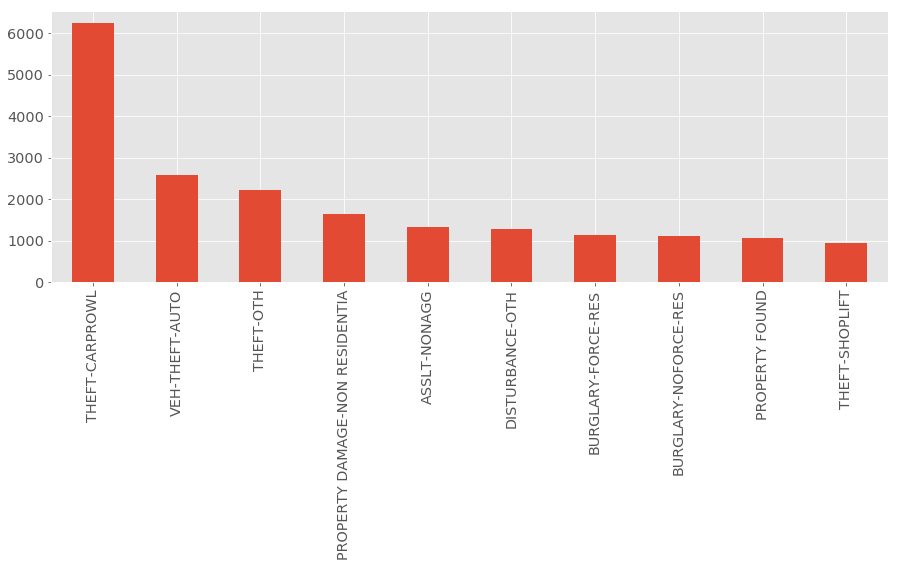

In [140]:
cnt = data['Offense Type'].value_counts()[:10]
cnt.plot.bar()
plt.show()

In [141]:
common = data[data['Offense Type'].isin(cnt.keys())]

Lets take a look at each of these common crimes and how common they are at each time of the day. We can see that most car-related crimes as well as theft and non-residential property damage occur between 22:00 at night and 1:00 in the morning. The opposite is true for shoplifting, which obviously is more common at times when more shops are open. Also lost or stolen property is found more frequently during the day which, again, is not very surprising. What is surprising is the lack of a clear trend when it comes to burglaries. The data does not support the commonly held belief that these happen mostly at night, as they seem to occur throughout the day, with only a dip between 1:00 and 7:00. Even criminals need to sleep sometimes!

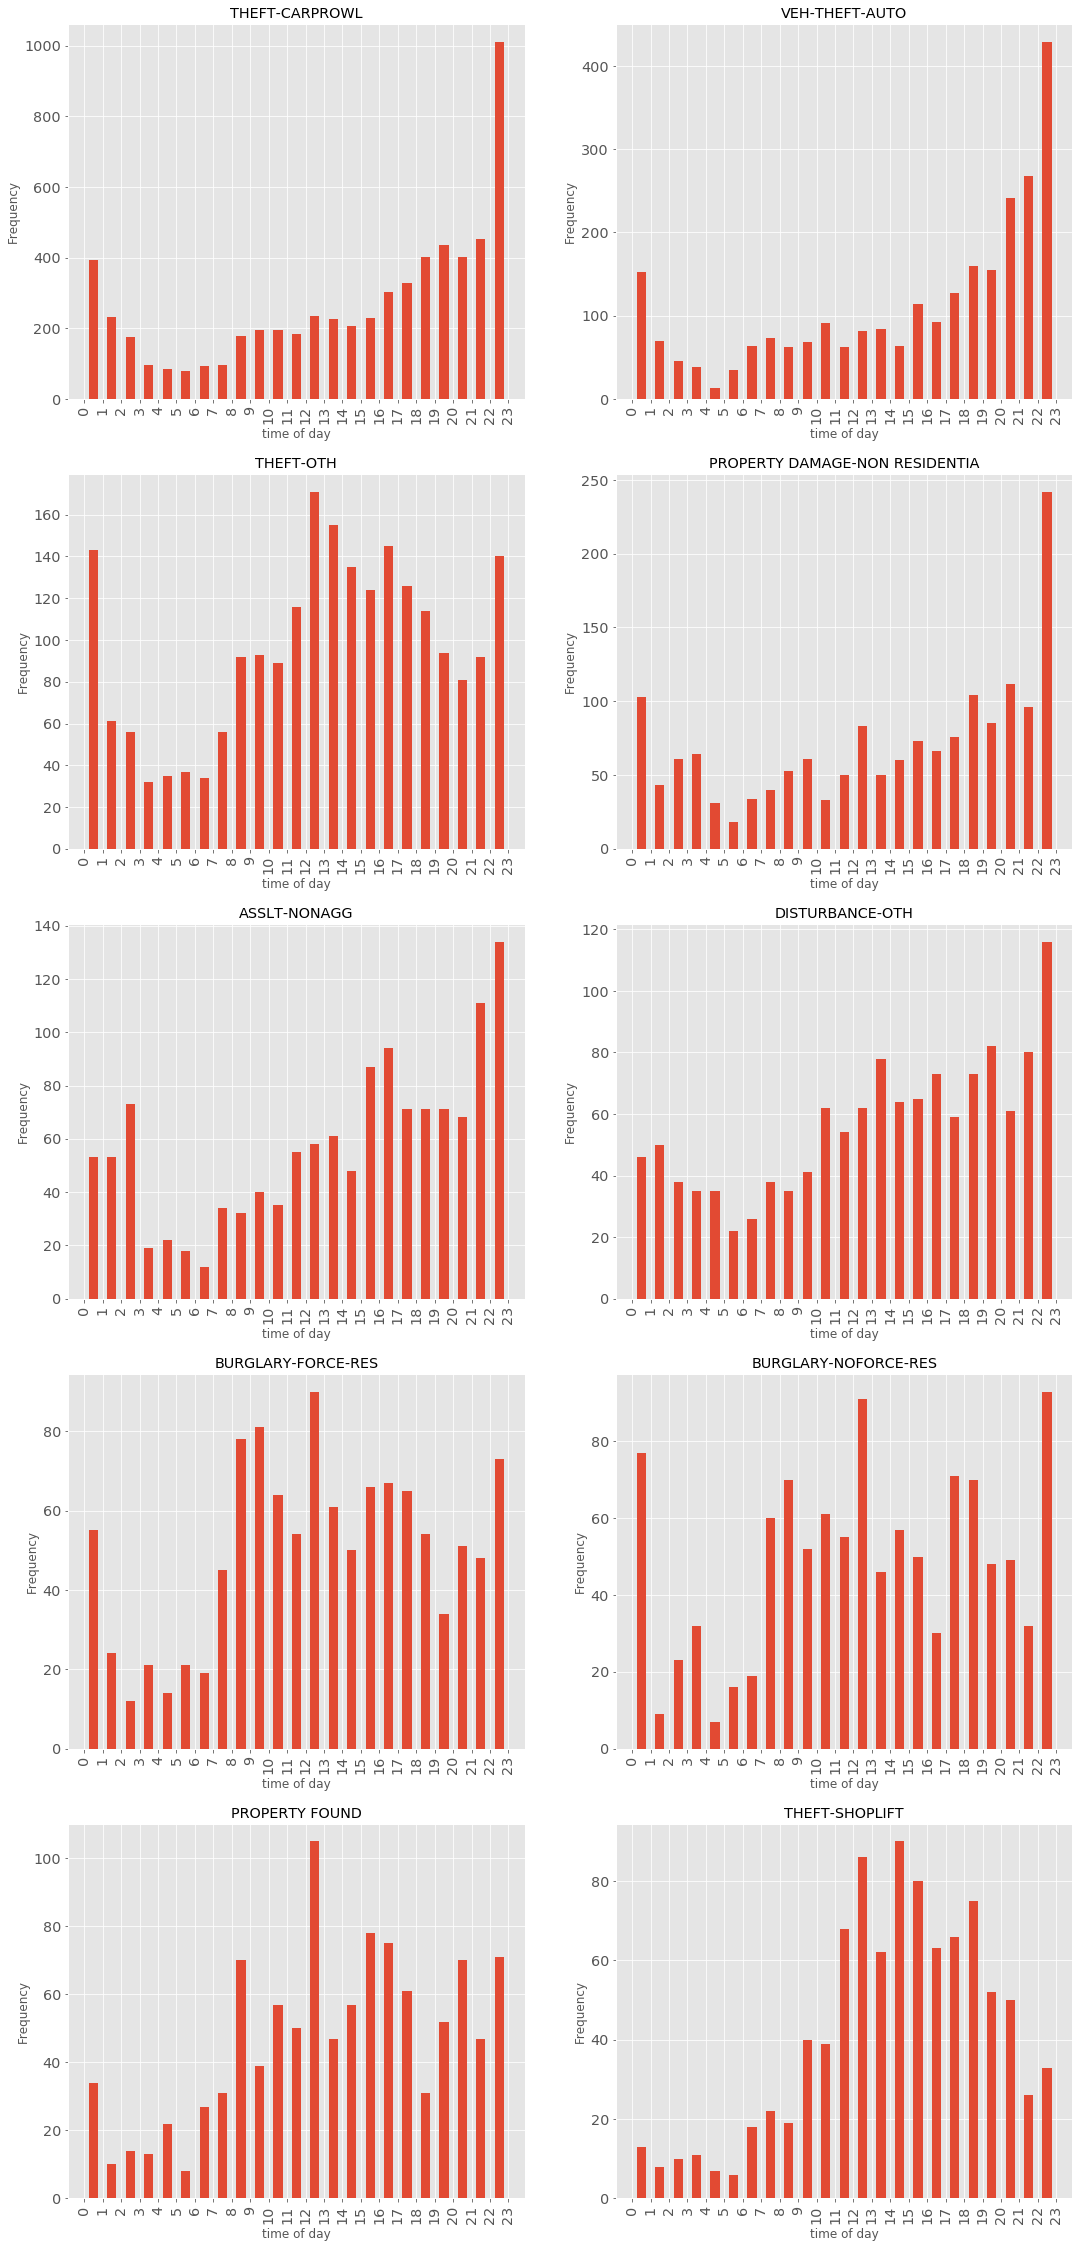

In [142]:
i=1
plt.figure(figsize=(18,40))
for crime in cnt.keys():
    plt.subplot(5,2,i)
    i = i+1
    common[common['Offense Type']==crime]['Occurred Date or Date Range Start'].dt.hour.plot.hist(bins=range(24), align='mid', rwidth=0.5)
    plt.xticks(range(24), rotation='vertical')
    plt.xlabel('time of day')
    plt.title(crime)
plt.show()

If we break down the common crimes over the different districts in Seattle, we see that some kinds of crime concentrate in certain neighbourhoods, while other occur everywhere in equal measures. For instance, in district K and M assault, shoplifting, theft (except car theft) and disturbances seem quite commonplace, whereas burglaries practically don't happen. In all likelihood, these are less affluent areas of the city. 

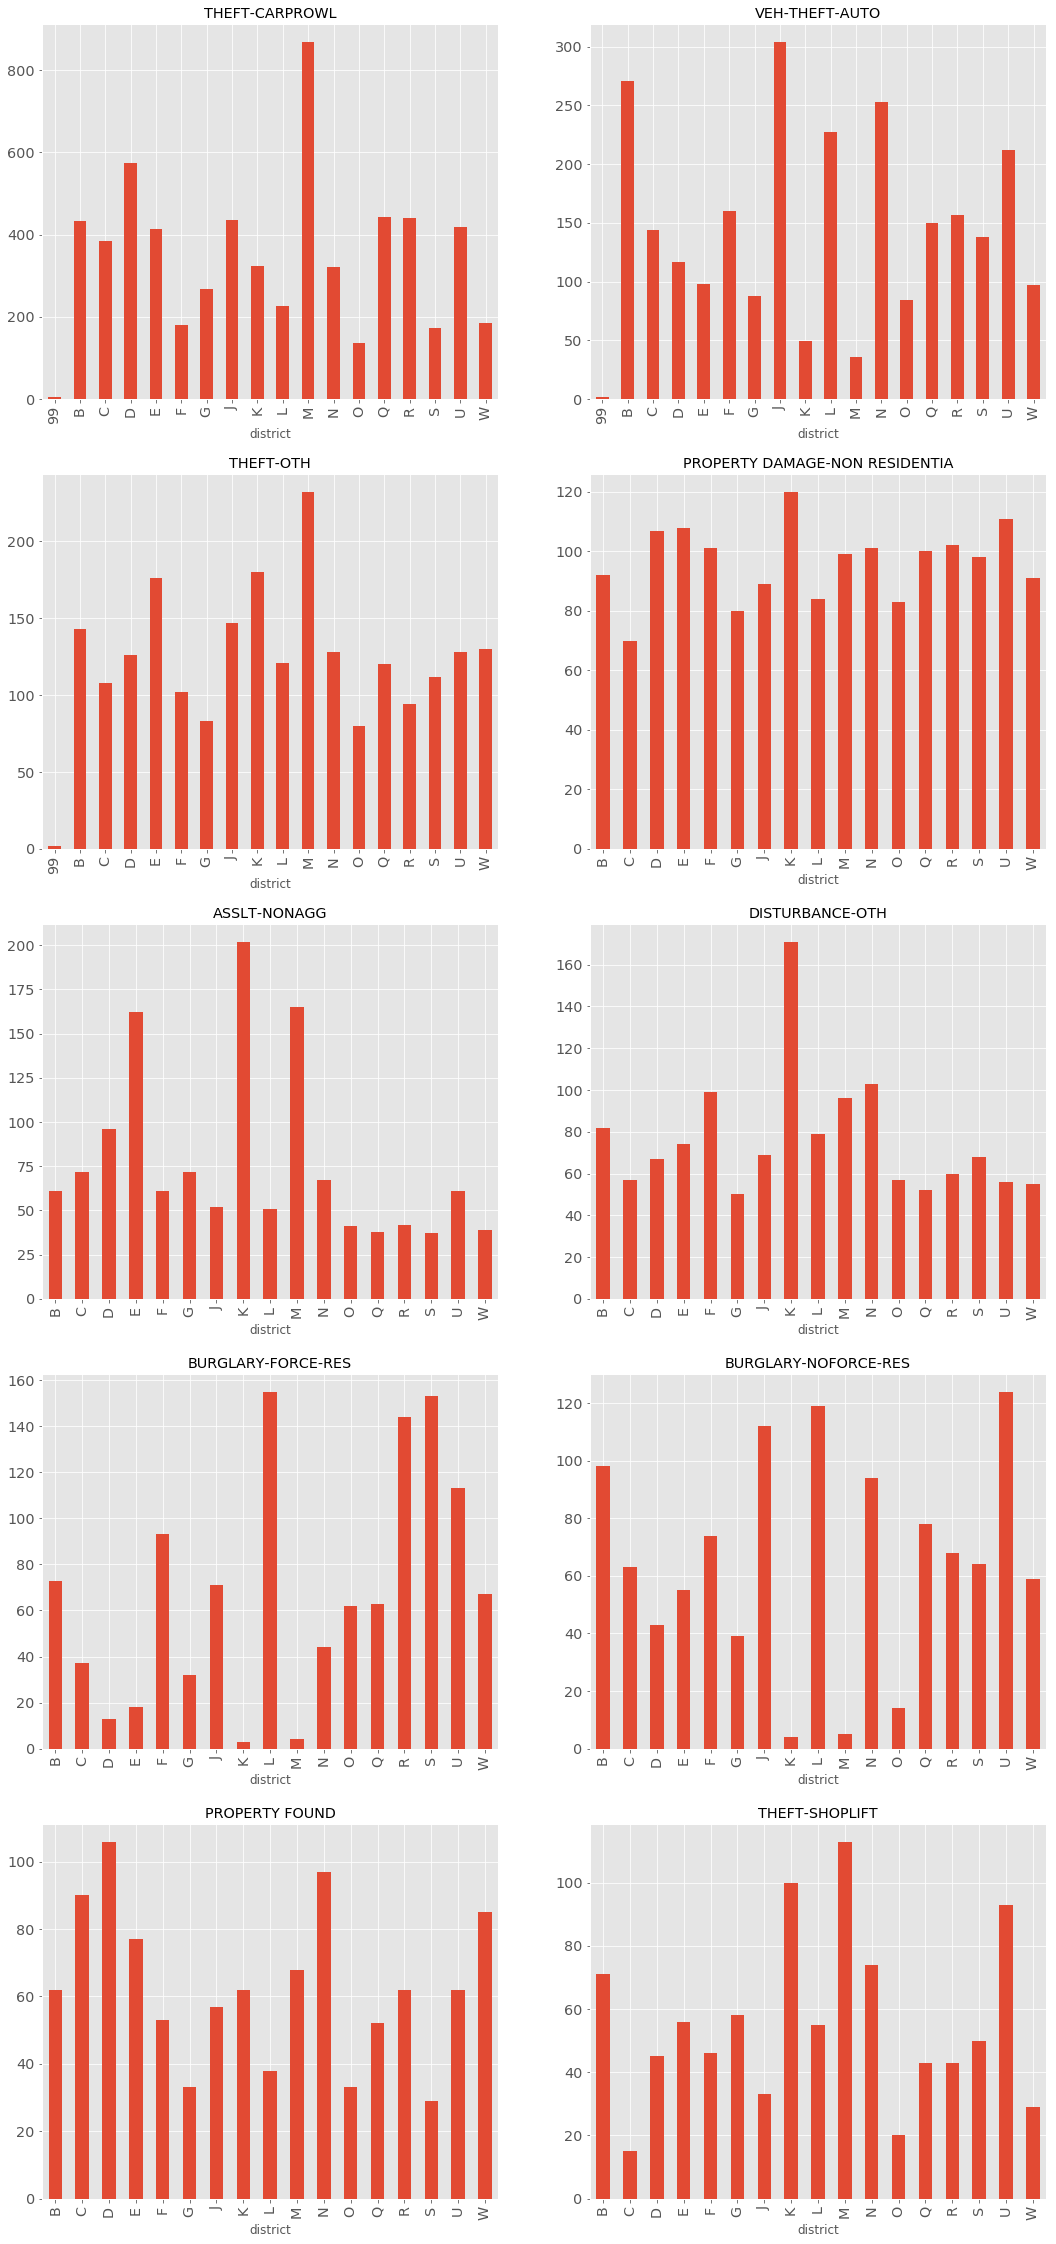

In [143]:
i=1
plt.figure(figsize=(18,40))
for crime in cnt.keys():
    plt.subplot(5,2,i)
    i = i+1
    common[common['Offense Type']==crime]['District/Sector'].value_counts().sort_index().plot.bar()
    #plt.xticks(range(24), rotation='vertical')
    plt.xlabel('district')
    plt.title(crime)
plt.show()

Looking at how the different crimes evolved over the Summer, we see that most crimes stayed more or less at the same level. A notable exception is vehicle theft which went down slightly in July, and quite sharply in August. It is not straightforward to determine the cause of this steep drop, but in all likelihood there was a prevention campaign or initiative by law enforcement to discourage this type of crime.

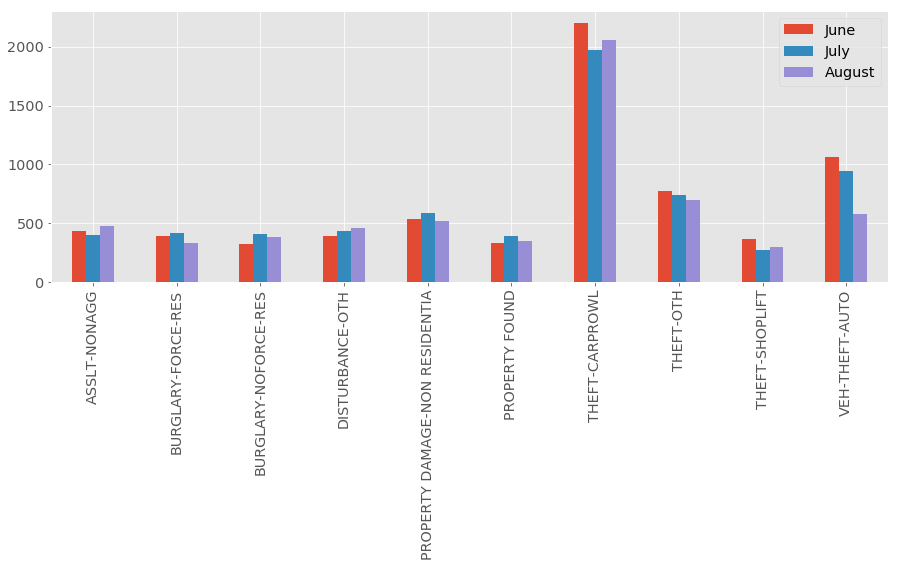

In [158]:
june_crime = common.groupby('Month')['Offense Type'].get_group(6).value_counts()
july_crime = common.groupby('Month')['Offense Type'].get_group(7).value_counts()
august_crime = common.groupby('Month')['Offense Type'].get_group(8).value_counts()
comp = pa.concat([june_crime,july_crime, august_crime], axis=1).sort_index()
comp.columns = ['June', 'July', 'August']
comp.plot.bar()
plt.show()